In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')
# size configuration of the plots
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Lets read the data

df = pd.read_csv("sample_data_set_2 - Sheet1 (1).csv")
df.head()


,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
0,08 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0
1,08 Sep 2020,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2
2,08 Sep 2020,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2
3,08 Sep 2020,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2
4,06 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0


In [3]:
# number of rows and columns
df.shape

(48293, 12)

In [4]:
# column features present
df.columns

Index(['Date', 'App', 'Ad Group', 'State', 'Revenue', 'Ad Requests',
       'Ad Responses', 'Fill Rate', 'Impressions', 'Render Rate', '1st Clicks',
       '2nd Clicks'],
      dtype='object')

In [5]:
# lets get some column type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48293 entries, 0 to 48292
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          48293 non-null  object 
 1   App           48270 non-null  object 
 2   Ad Group      44300 non-null  object 
 3   State         48293 non-null  object 
 4   Revenue       48293 non-null  float64
 5   Ad Requests   48293 non-null  int64  
 6   Ad Responses  48293 non-null  int64  
 7   Fill Rate     48293 non-null  object 
 8   Impressions   48293 non-null  int64  
 9   Render Rate   48293 non-null  object 
 10  1st Clicks    48293 non-null  int64  
 11  2nd Clicks    48293 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 4.4+ MB


In [6]:
# getting the percentage of null values present

print("Percentage of null values\n")
print(df.isnull().sum()/df.shape[0]*100)

Percentage of null values

Date            0.000000
App             0.047626
Ad Group        8.268279
State           0.000000
Revenue         0.000000
Ad Requests     0.000000
Ad Responses    0.000000
Fill Rate       0.000000
Impressions     0.000000
Render Rate     0.000000
1st Clicks      0.000000
2nd Clicks      0.000000
dtype: float64


In [7]:


null_df = df[df['Ad Group'].isnull()]
null_df.head(4)



,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
10131,12 Sep 2020,Vehicle Owner Details,NaN,Maharashtra,0.0,11174,0,0.00%,0,0.00%,0,0
11339,11 Sep 2020,Chhota Bheem Race Game,NaN,Unresolved,0.0,7527,0,0.00%,0,0.00%,0,0
11511,09 Sep 2020,Chhota Bheem Race Game,NaN,Unresolved,0.0,7269,0,0.00%,0,0.00%,0,0
11547,10 Sep 2020,Chhota Bheem Race Game,NaN,Unresolved,0.0,7193,0,0.00%,0,0.00%,0,0


In [8]:
null_df.shape

(3993, 12)

In [9]:


null_df_rev = null_df.groupby('App')['Revenue'].sum().reset_index()
null_df_rev.sort_values(by='Revenue', ascending=False, ignore_index=True)



,App,Revenue
0,Adorable Girl Dress Up,0.0
1,Offroad Tuk Tuk Hill Adventure,0.0
2,Motu Patlu Fruit Plaza,0.0
3,Motu Patlu Game,0.0
4,Motu Patlu Ki Chopper,0.0
...,...,...
136,Fun Kid Racing,0.0
137,Fire Fighters Racing for Kids,0.0
138,Final kick: Online football,0.0
139,Fancy Girl Dress Up,0.0


In [10]:
null_df_rev = null_df.groupby('App')['Ad Responses'].sum().reset_index()
null_df_rev.sort_values(by='Ad Responses', ascending=False, ignore_index=True)

,App,Ad Responses
0,Adorable Girl Dress Up,0
1,Offroad Tuk Tuk Hill Adventure,0
2,Motu Patlu Fruit Plaza,0
3,Motu Patlu Game,0
4,Motu Patlu Ki Chopper,0
...,...,...
136,Fun Kid Racing,0
137,Fire Fighters Racing for Kids,0
138,Final kick: Online football,0
139,Fancy Girl Dress Up,0


In [11]:
df.dropna(inplace=True)
df.shape

(44277, 12)

In [12]:
df[df.duplicated(keep=False)]

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
138,09 Sep 2020,Callbreak Multiplayer,Quirky_Eng,Uttar Pradesh,0.0,3501482,1,100%,1,100%,0,0
141,09 Sep 2020,Callbreak Multiplayer,Quirky_Eng,Uttar Pradesh,0.0,3501482,1,100%,1,100%,0,0
216,07 Sep 2020,Callbreak Multiplayer,Quirky_Eng,Bihar,0.0,2346426,2,100%,2,100%,0,0
219,07 Sep 2020,Callbreak Multiplayer,Quirky_Eng,Bihar,0.0,2346426,2,100%,2,100%,0,0
334,12 Sep 2020,Callbreak Multiplayer,non stop fun,Bihar,0.0,2141294,1,100%,1,100%,0,0
341,12 Sep 2020,Callbreak Multiplayer,non stop fun,Bihar,0.0,2141294,1,100%,1,100%,0,0
771,10 Sep 2020,Callbreak Multiplayer,Quirky_Eng,Madhya Pradesh,0.0,1730541,1,99.9%,1,100%,0,0
775,10 Sep 2020,Callbreak Multiplayer,Quirky_Eng,Madhya Pradesh,0.0,1730541,1,99.9%,1,100%,0,0
900,06 Sep 2020,Callbreak Multiplayer,Quirky_Eng,West Bengal,0.0,1517350,1,100%,1,100%,0,0
902,06 Sep 2020,Callbreak Multiplayer,Quirky_Eng,West Bengal,0.0,1517350,1,100%,1,100%,0,0


In [13]:
df.drop_duplicates()
df.shape

(44277, 12)

In [14]:
df['Date'] = pd.to_datetime(df['Date'])


In [15]:
df.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
0,2020-09-08,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0
1,2020-09-08,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2
2,2020-09-08,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2
3,2020-09-08,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2
4,2020-09-06,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0


In [16]:
df['Date'].nunique()

7

In [17]:
df['App'].nunique()

116

In [18]:
df['Ad Group'].nunique()

188

In [19]:
df['State'].value_counts()

Unresolved             2435
Karnataka              2317
Tamil Nadu             2260
Maharashtra            2062
Kerala                 1927
Telangana              1758
Gujarat                1712
Uttar Pradesh          1694
Delhi                  1675
Rajasthan              1672
Madhya Pradesh         1637
West Bengal            1592
Bihar                  1555
Andhra Pradesh         1348
Assam                  1348
Haryana                1344
Punjab                 1338
Odisha                 1248
Manipur                1175
Chhattisgarh           1161
Jammu and Kashmir      1153
Uttarakhand            1080
Chandigarh             1069
Himachal Pradesh       1034
Jharkhand              1004
Puducherry              892
Meghalaya               715
Tripura                 700
Goa                     611
Arunachal Pradesh       608
Sikkim                  607
Nagaland                517
Mizoram                 379
12096464                348
Andaman and Nicobar     285
Laccadives          

In [20]:
print(df['App'].value_counts())

Callbreak Multiplayer             3776
World Cricket Championship 2      3270
Bottle Shooting Game              2320
World Cricket Championship  Lt    1858
Indian Rummy Offline              1614
                                  ... 
Robot Ninja Battle Royale            2
Hitwicket - Own a Cricket Team       2
39052237                             2
OCR Barcod Scanner                   1
Blackboard Edutech                   1
Name: App, Length: 116, dtype: int64


In [21]:
revenue_by_app = df.groupby('App')['Revenue'].sum().reset_index()
revenue_by_app

,App,Revenue
0,(SDK X) Cricket Mazza,34.36
1,12611047,0.00
2,39052237,0.00
3,4 Digit Code,0.06
4,86507421,0.00
...,...,...
111,World Cricket Battle,0.00
112,World Cricket Championship Lt,145.27
113,World Cricket Championship 2,643.44
114,World of cricket,0.00


In [30]:
new_df = revenue_by_app[revenue_by_app['Revenue'] > 0].sort_values(by = 'Revenue', ascending = False).reset_index()
new_df

,index,App,Revenue
0,19,Callbreak Multiplayer,869.40
1,14,Bottle Shooting Game,753.89
2,113,World Cricket Championship 2,643.44
3,104,Traffic Bangalore: Check Fines,280.33
4,112,World Cricket Championship Lt,145.27
5,44,Indian Rummy Offline,104.28
6,100,Tarot Cards Reading and Numerology App,98.86
7,59,Mindi Offline,87.34
8,45,Indian Train Simulator 2018,68.51
9,98,Sticker Maker,61.95


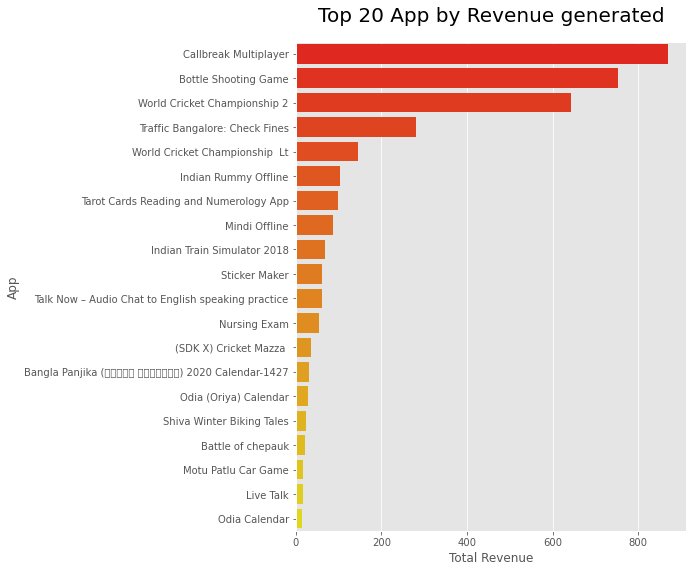

In [44]:
Tier1_df = new_df.head(20)
plt.figure(figsize = (7,9))
sns.barplot( x='Revenue', y='App', data=Tier1_df, palette = 'autumn')
plt.xlabel('Total Revenue')
plt.title('Top 20 App by Revenue generated', fontsize=20, pad=20)
plt.show()

In [48]:
revenue_by_adgroup = df.groupby('Ad Group')['Revenue', 'Impressions'].sum().reset_index().sort_values(by = 'Impressions', ascending = False)
revenue_by_adgroup.head(20)


,Ad Group,Revenue,Impressions
56,Dream11_NonCore,236.07,50103937
44,Cricket Mazza Banner (AdX),0.00,48284847
76,MY11Circle_IN_SG_1500,271.80,18646537
65,IPL banner,260.04,18362860
122,Rooter_Callbreak,50.50,13399054
182,revshare,0.00,6992276
62,Gujrati_GL,105.20,4107075
54,Dream11,149.45,3376462
35,Callbreak Multiplayer2_Admob_L,0.00,3372215
0,11wickets_CPR,0.80,2941606


In [24]:
revenue_by_adgroup[revenue_by_adgroup['Revenue'] > 0].sort_values(by = 'Revenue', ascending = False).reset_index().head(20)

,index,Ad Group,Revenue
0,30,Bottle Shooting Game_Admob_ML,350.40
1,76,MY11Circle_IN_SG_1500,271.80
2,36,Callbreak Multiplayer2_Inmobi_No Floor,264.99
3,65,IPL banner,260.04
4,56,Dream11_NonCore,236.07
5,160,Traffic bangalore_Admob_New Banner,211.05
6,168,WCC2_Inmobi_H,164.40
7,54,Dream11,149.45
8,123,Rooter_Cricket,122.69
9,62,Gujrati_GL,105.20


In [25]:

new_df = df[ df['App'] =='Callbreak Multiplayer']
new_df = new_df.groupby('Ad Group')['Revenue', 'Impressions','1st Clicks','2nd Clicks'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
new_df


,Ad Group,Revenue,Impressions,1st Clicks,2nd Clicks
4,Callbreak Multiplayer2_Inmobi_No Floor,264.99,2828252,82826,26686
9,Dream11_NonCore,162.26,47095154,279942,71446
13,MY11Circle_IN_SG_1500,132.80,15681521,231124,71431
11,IPL banner,130.68,15770554,234873,73951
25,Rooter_Callbreak,50.50,13399054,101635,101055
18,RC_GJ_Stock,26.30,1131075,11753,3749
32,non stop fun,18.72,632024,2848,686
10,Gujrati_GL,13.15,639698,2764,691
7,Danishsolo_Kan,9.36,81837,449,126
23,RC_TN_ENG,9.36,91015,389,125


In [26]:
new_df.shape

(35, 5)

In [27]:
new_df[new_df['Revenue']>0].shape

(23, 5)

In [28]:


new_df = df[ df['App'] =='Bottle Shooting Game']
new_df= new_df.groupby('Ad Group')['Revenue', 'Impressions','1st Clicks','2nd Clicks'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
new_df


,Ad Group,Revenue,Impressions,1st Clicks,2nd Clicks
0,Bottle Shooting Game_Admob_ML,350.40,2090511,128963,35054
8,Dream11,81.13,1926622,296615,76003
1,Bottle Shooting Game_Admob_No Floor,75.73,2092351,89453,25952
2,Bottle Shooting Game_Inmobi_H,45.98,195420,28521,7248
9,Dream11_NonCore,45.14,2057633,151640,41661
18,Rooter_NonCricket,33.43,470311,22562,22300
10,Gujrati_GL,31.56,438705,52332,15040
12,MY11Circle_IN_SG_1500,23.76,1333729,154624,43541
11,IPL banner,19.80,952530,101348,28889
14,RC_MH_English,18.72,543442,34949,9399


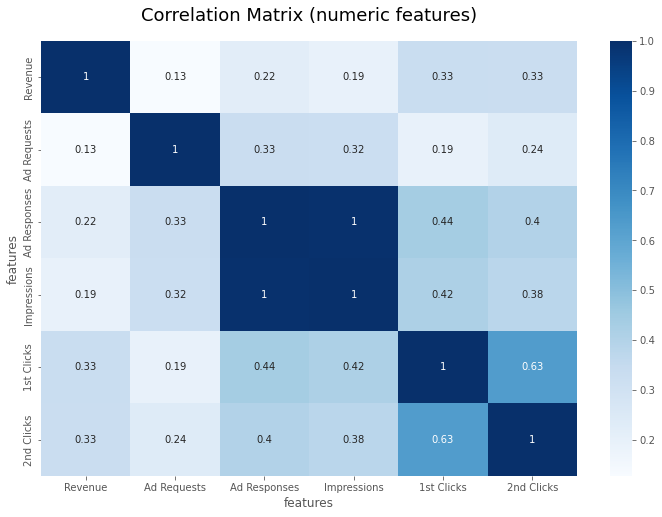

In [29]:


sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Blues')
plt.title('Correlation Matrix (numeric features)', fontsize=18, pad=20)
plt.xlabel("features")
plt.ylabel("features")
plt.show()

